   Y16  Y15  Y14  Y13  Y12  Y11  Y10  Y9  Y8  Y7  Y6  Y5  Y4  Y3  Y2  Y1
0    0    0    0    0    0    0    0   0   0   0   0   0   0   0   0   0
1    0    0    0    1    0    1    1   1   1   1   0   1   1   0   0   1
2    0    0    0    0    1    0    0   0   0   0   0   0   0   0   0   0
3    0    1    1    1    1    1    1   1   1   1   1   1   1   1   1   1
4    0    0    1    1    0    1    1   1   0   0   0   0   0   0   0   0
(16181, 16)
Optimal number of features : 10
[ True  True  True False  True False  True False False False  True  True
  True  True  True]


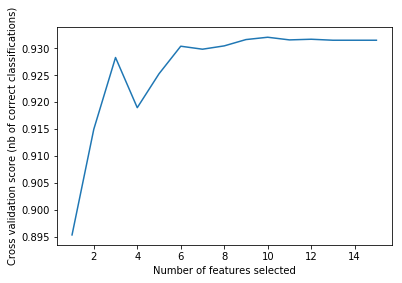

In [13]:
import numpy as np
import pandas as pd

#importing data
tspath = 'nltcs/nltcs.ts.data'
tdata = pd.read_table(tspath, sep=',')
print(tdata.head())
print(tdata.shape)

#now predicting y1 wrt others
y = tdata.Y1
# print(Y.describe)
X = tdata.drop('Y1',axis=1)
# print(X.head())
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
#Getting the best feature set
print(rfecv.support_)
#now using a neural network for classification
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30))
#using selected features
X_sel = X[X.columns[rfecv.support_]]

clf.fit(X_sel,y)


[ True  True  True False  True False  True False False False  True  True
  True  True  True]


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
#importing test data
testpath = 'nltcs/nltcs.test.data'
testdata = pd.read_table(testpath, sep=',')
# print(testdata.head())
# print(testdata.shape)

#now predicting y1 wrt others
ytest = testdata.Y1
# print(ytest.describe)
XTEST = testdata.drop('Y1',axis=1)
XTsel = XTEST[XTEST.columns[rfecv.support_]]
# print(XTEST.head())

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = clf.predict(XTsel)
print(classification_report(ytest,predictions))


             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2897
          1       0.75      0.72      0.73       339

avg / total       0.94      0.95      0.94      3236



,Y16,Y15,Y14,Y12,Y10,Y6,Y5,Y4,Y3,Y2
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,0,1,1
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0
